<a href="https://colab.research.google.com/github/yk-Jeong/DS_study/blob/main/4%EC%A3%BC%EC%B0%A8_20221117_%EB%BF%85%EB%BF%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 0. 사전작업

In [218]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# !pip install koreanize-matplotlib

!pip install koreanize_matplotlib
import koreanize_matplotlib

df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip", 
    encoding="cp949")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [219]:
print(df.shape)
df.head()
df.describe(include="object")
df["판매유형별"].value_counts()

(2772, 5)


면세점 이외    2772
Name: 판매유형별, dtype: int64

### Q1. 시점 컬럼에서 연도와 분기에 대한 파생변수를 생성하고 기술통계를 구해주세요.

- 데이터 컬럼을 단위인 "백만"으로 변경해 주세요.
- describe() 로 기술통계를 구했을 때 다음과 같은 결과가 나오도록 합니다. 아래 결과는 예시로 소숫점 자리수가 다르게 표시되더라도 값이 같다면 괜찮습니다.
- 전처리한 백만, 연도, 분기 컬럼이 수치형 데이터 일 때 아래와 같은 결과가 나오니 데이터가 수치 형태로 되어 있는지도 확인해 주세요!
- 데이터는 위에서 제공된 데이터를 사용합니다.
- 해당 기술통계로 알 수 있는 정보가 무엇인지도 함께 작성해 주세요!

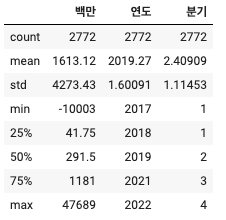


In [220]:
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033


In [221]:
# 컬럼명 데이터 -> 백만으로 변경 

df.rename(columns = {'데이터':'백만'}, inplace = True)

In [222]:
# 시점에서 연도, 분기 분리

df['연도'] = df['시점'].map(lambda x: int(x.split('.')[0]))
df['분기'] = df['시점'].map(lambda x: int(x.split('.')[1].split('/')[0]))
df.drop('시점', axis=1, inplace=True)
df.head()

,국가(대륙)별,상품군별,판매유형별,백만,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2033,2018,1


In [223]:
df.describe()

,백만,연도,분기
count,2772.000000,2772.000000,2772.000000
mean,1613.116522,2019.272727,2.409091
std,4273.426107,1.600909,1.114533
min,-10003.000000,2017.000000,1.000000
25%,41.750000,2018.000000,1.000000
50%,291.500000,2019.000000,2.000000
75%,1181.000000,2021.000000,3.000000
max,47689.000000,2022.000000,4.000000


### Q2. pivot_table을 사용하여 **국가(대륙)별 연도별 판매액의 합계**를 분석해 주세요.

- 국가(대륙)별 연도별 판매액의 합계를 구해서 어느 지역에 판매액이 많은지를 알아보겠습니다.
- pivot_table 을 사용하여 다음의 결과를 구하고 시각화 해주세요!
- 그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.

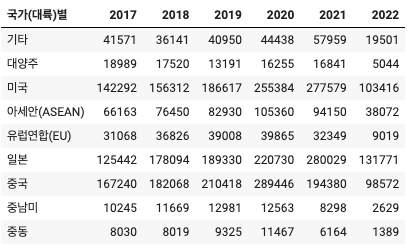

In [224]:
pdf1 = pd.pivot_table(df,  index = '국가(대륙)별', columns = '연도', values = '백만', aggfunc='sum')
pdf1

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),66163,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019
일본,125442,178094,189330,220730,280029,131771
중국,167240,182068,210418,289446,194380,98572
중남미,10245,11669,12981,12563,8298,2629
중동,8030,8019,9325,11467,6164,1389


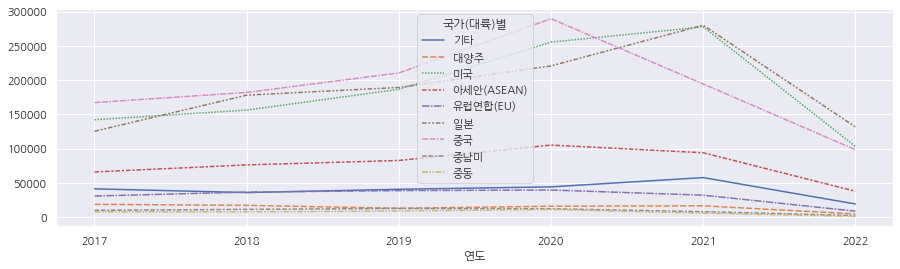

In [225]:
# 시각화

sns.set(font_scale=1, font='NanumGothic')
plt.figure(figsize=(15, 4))
sns.lineplot(data=pdf1.T)

### Q3. groupby를 사용하여 **2020년의 온라인 해외판매 상품군을 지역별 합계를 구해 분석**해 주세요.

- 2020년은 코로나로 인해 전국민이 어려움을 겪었던 시기입니다. 또, 아마존 등의 해외 온라인 판매가 늘어난 시기이기도 합니다. 이 때, 해외 어느지역에 온라인 판매가 얼마나 되었는지를 groupby() 와 unstack()을 활용해서 합계를 구하고 분석해 주세요! 또 분석한 결과를 보고 어떤 인사이트를 얻었는지도 함께 작성해 주세요!
- 그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.

In [226]:
df_corona = df.groupby('연도').get_group(2020)
df_corona = df_corona.groupby('국가(대륙)별').sum()
df_corona

,백만,연도,분기
국가(대륙)별,,,
기타,44438,113120,140
대양주,16255,113120,140
미국,255384,113120,140
아세안(ASEAN),105360,113120,140
유럽연합(EU),39865,113120,140
일본,220730,113120,140
중국,289446,113120,140
중남미,12563,113120,140
중동,11467,113120,140


In [236]:
df_corona.T

국가(대륙)별,기타,대양주,미국,아세안(ASEAN),유럽연합(EU),일본,중국,중남미,중동
백만,44438,16255,255384,105360,39865,220730,289446,12563,11467
연도,113120,113120,113120,113120,113120,113120,113120,113120,113120
분기,140,140,140,140,140,140,140,140,140


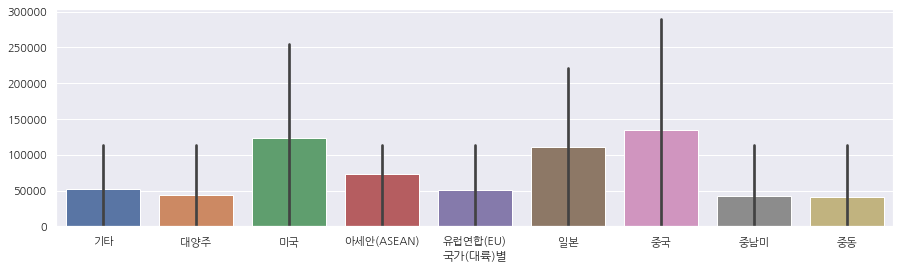

In [237]:
plt.figure(figsize=(15, 4))
sns.barplot(data = df_corona.T)

### Q4. 주요 판매 국가와 상품군에 대해 2021년까지의 연도별 온라인 직접 판매액 합계를 시각화 해주세요.

- 온라인 직접 판매액이 높은 지역은 "미국", "중국", "일본" 이며, 주요 판매 상품군은 "의류 및 패션 관련상품", "화장품", "음반·비디오·악기" 입니다. 2021년까지의 각 지역별 제품별 판매액을 시각화 해주세요!
- 시각화 결과의 색상이나 스타일이나 스타일은 달라도 괜찮습니다.
 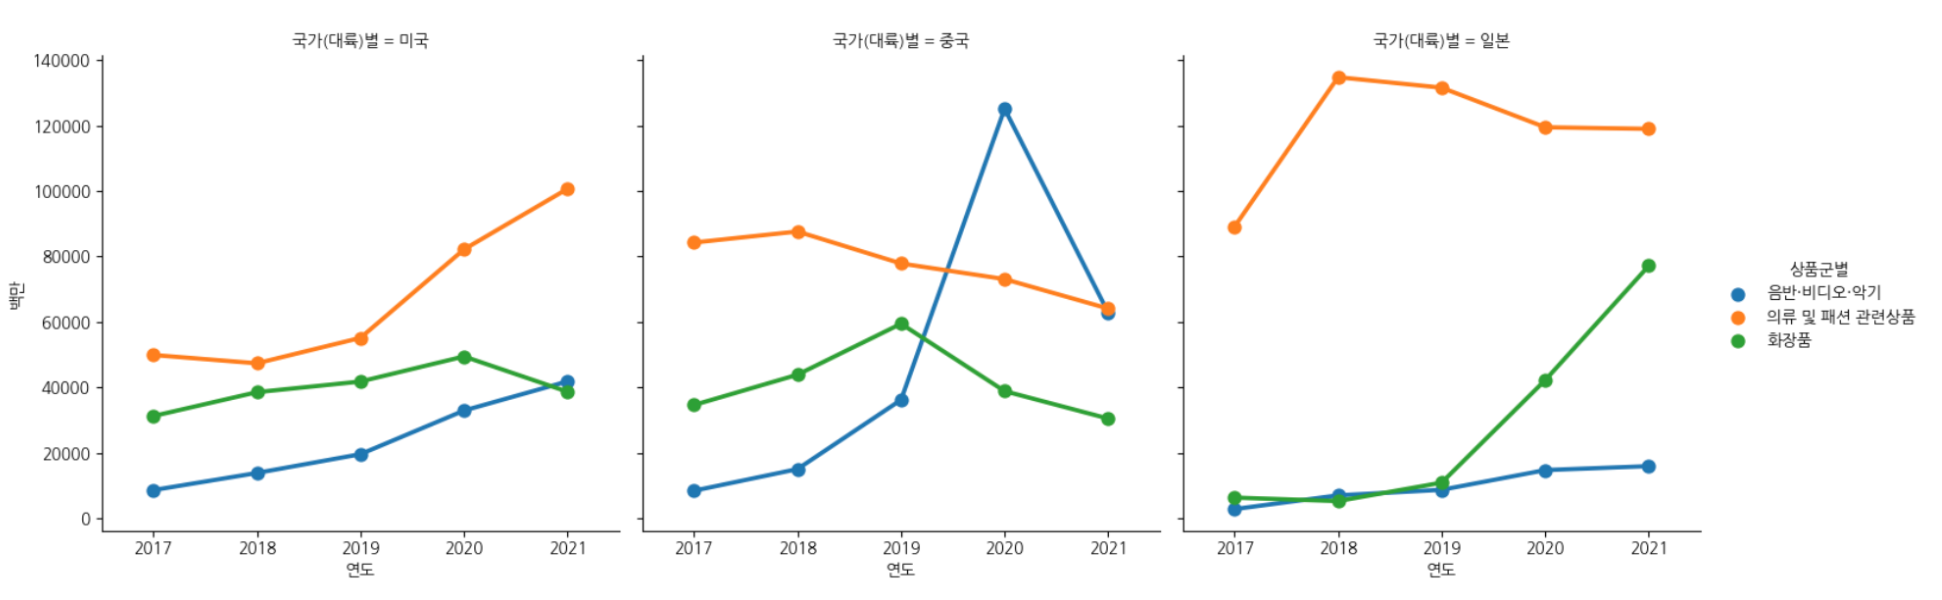

#### 4-1. 각국 데이터 확인

In [123]:
# 미국

usa = df.groupby('국가(대륙)별').get_group('미국')[:-2]
filter = usa['상품군별'].str.contains("의류|화장품|음반")
usa = usa[filter]
usa

,국가(대륙)별,상품군별,판매유형별,백만,연도,분기
110,미국,음반·비디오·악기,면세점 이외,1922,2017,1
111,미국,음반·비디오·악기,면세점 이외,1778,2017,2
112,미국,음반·비디오·악기,면세점 이외,2281,2017,3
113,미국,음반·비디오·악기,면세점 이외,2647,2017,4
114,미국,음반·비디오·악기,면세점 이외,2362,2018,1
...,...,...,...,...,...,...
193,미국,화장품,면세점 이외,8797,2021,2
194,미국,화장품,면세점 이외,8125,2021,3
195,미국,화장품,면세점 이외,9912,2021,4
196,미국,화장품,면세점 이외,6600,2022,1


In [124]:
china = df.groupby('국가(대륙)별').get_group('중국')[:-2]
filter = china['상품군별'].str.contains("의류|화장품|음반")
china = china[filter]
china

,국가(대륙)별,상품군별,판매유형별,백만,연도,분기
418,중국,음반·비디오·악기,면세점 이외,1629,2017,1
419,중국,음반·비디오·악기,면세점 이외,1346,2017,2
420,중국,음반·비디오·악기,면세점 이외,3026,2017,3
421,중국,음반·비디오·악기,면세점 이외,2436,2017,4
422,중국,음반·비디오·악기,면세점 이외,1850,2018,1
...,...,...,...,...,...,...
501,중국,화장품,면세점 이외,5546,2021,2
502,중국,화장품,면세점 이외,8609,2021,3
503,중국,화장품,면세점 이외,10733,2021,4
504,중국,화장품,면세점 이외,6032,2022,1


In [125]:
japan = df.groupby('국가(대륙)별').get_group('일본')[:-2]
filter = japan['상품군별'].str.contains("의류|화장품|음반")
japan = japan[filter]
japan

,국가(대륙)별,상품군별,판매유형별,백만,연도,분기
726,일본,음반·비디오·악기,면세점 이외,537,2017,1
727,일본,음반·비디오·악기,면세점 이외,715,2017,2
728,일본,음반·비디오·악기,면세점 이외,899,2017,3
729,일본,음반·비디오·악기,면세점 이외,673,2017,4
730,일본,음반·비디오·악기,면세점 이외,936,2018,1
...,...,...,...,...,...,...
809,일본,화장품,면세점 이외,18768,2021,2
810,일본,화장품,면세점 이외,23380,2021,3
811,일본,화장품,면세점 이외,22555,2021,4
812,일본,화장품,면세점 이외,26664,2022,1


#### 4-2. 시각화

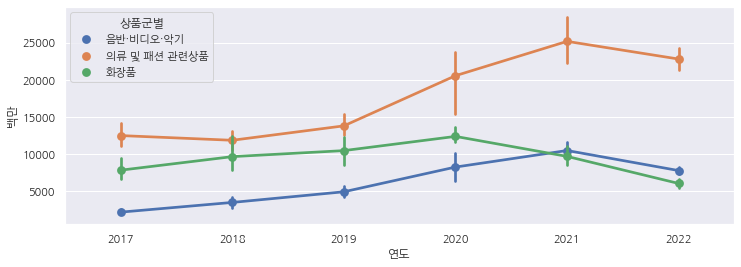

In [185]:
# 미국
plt.figure(figsize=(12, 4))
sns.lineplot(data = usa, x = '연도', y='백만')
sns.pointplot(data = usa, x = '연도', y='백만', hue = '상품군별')

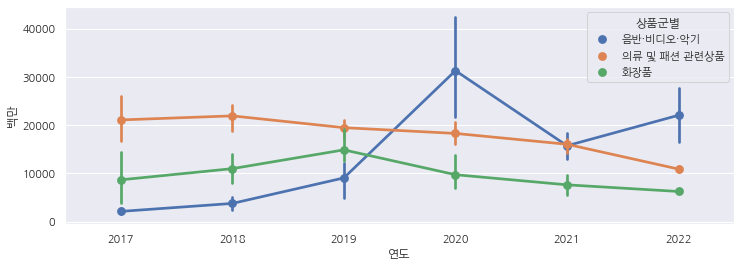

In [184]:
# 중국

plt.figure(figsize=(12, 4))
sns.lineplot(data = china, x = '연도', y='백만')
sns.pointplot(data = china, x = '연도', y='백만', hue = '상품군별')

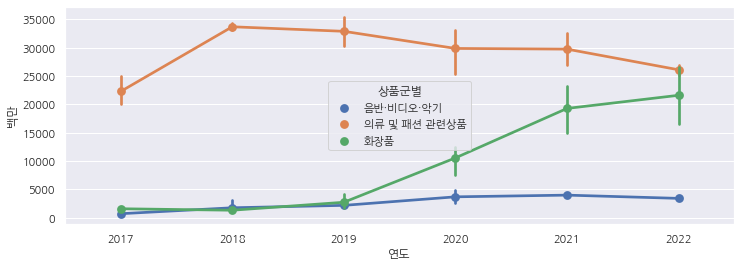

In [187]:
# 일본

plt.figure(figsize=(12, 4))
sns.lineplot(data = japan, x = '연도', y='백만')
sns.pointplot(data = japan, x = '연도', y='백만', hue = '상품군별')